# Similarity

Similarity between two songs have been defined by Tchernichovski et al (2000). This is a reimplementation of this algorithm.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from scipy.io import wavfile


Let's first reload two unrelated songs.

In [2]:
sr, sig = wavfile.read('../songs/simple.wav')
sr2, sig2 = wavfile.read('../songs/samba.wav')

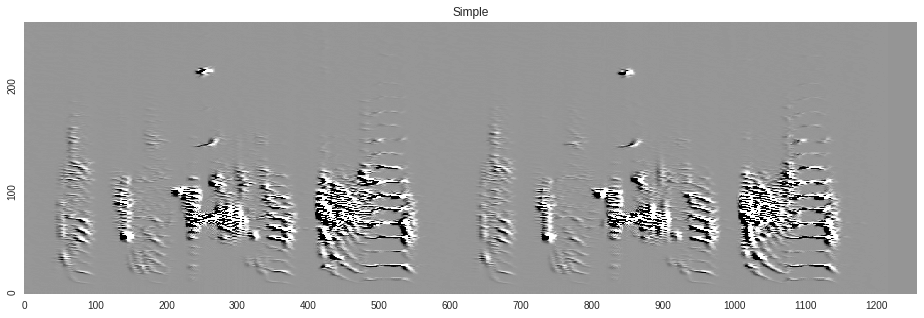

In [5]:
spec_derivs = bsa.spectral_derivs(sig)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_derivs, 0.05, ax)
ax.set_title('Simple')
plt.show(fig)

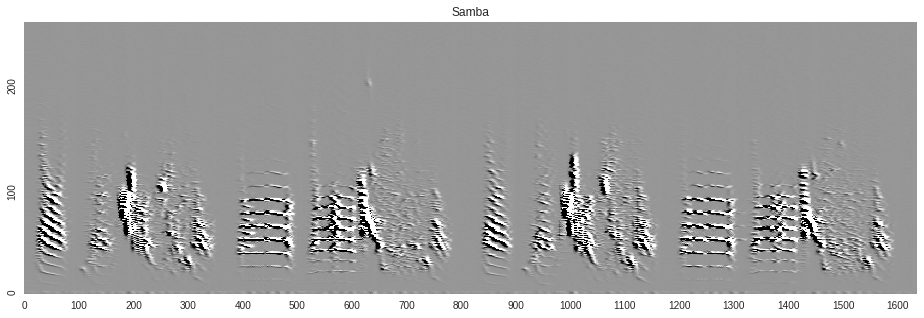

In [6]:
spec_derivs = bsa.spectral_derivs(sig2)
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_derivs, 0.05, ax)
ax.set_title('Samba')
plt.show(fig)

## Compare their similarity

Let's see if simple could is similar to the reference song samba

0.336718067184


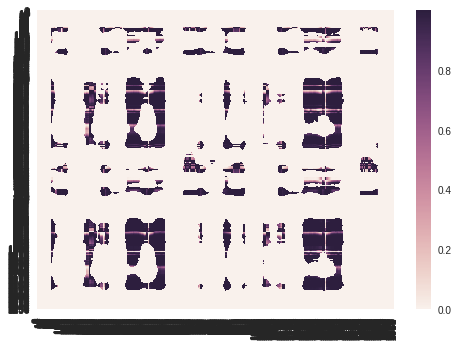

In [26]:
sim = bsa.similarity(sig, sig2, threshold=0.1)
print(sim['similarity'])
sns.heatmap(sim['sim_matrix'])

As we can see, simple is similar to samba only by 34%.

Is simple similar to itself?


Simple is similar to itself at 55%. It supposed to be close to itself at at least 95%. I have to look into that.

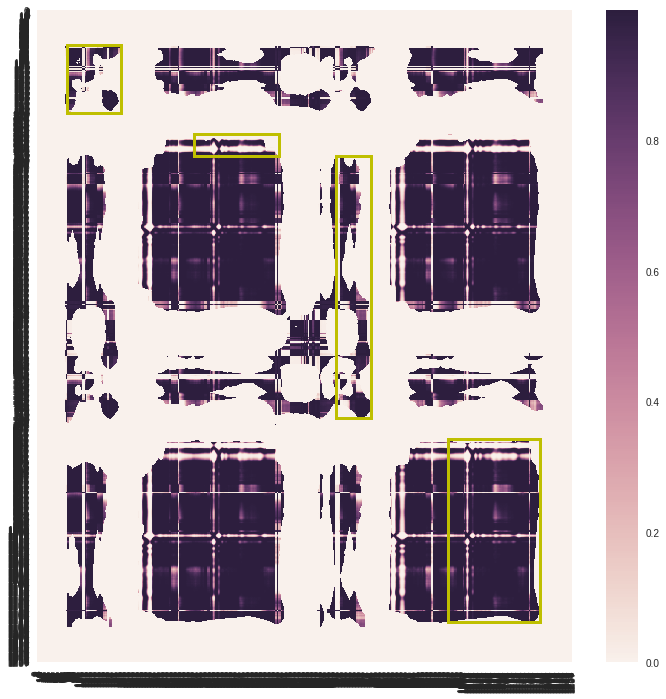

In [25]:
import matplotlib.patches as p
plt.figure(figsize=(12, 12))
ax = sns.heatmap(sim['sim_matrix'])
for section in sim['sections']:
    xy = (section['beg'][0], sim['sim_matrix'].shape[1] - section['end'][1])
    width = section['end'][0] - section['beg'][0]
    height = section['end'][1] - section['beg'][1]
    ax.add_patch(p.Rectangle(xy, width, height, fill=False, edgecolor='y', linewidth=3))